### Импорты

In [1]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ImagesDownloader import ImagesDownloader
from ImagesGenerator import ImagesGenerator

In [2]:
def plot_image(path:Path | Image.Image | str) -> None: 
    """Plot image by path or PIL Image object.

    Args:
        path (Path | Image.Image | str): Path to image or image.
    """
    if isinstance(path, (Path, str)):
        image = Image.open(path)
    elif isinstance(path, Image.Image):
        image = path
    plt.title(f'imgsize: {image.size}')
    plt.imshow(image)
    plt.show()
    

IMAGES_DATA_PATH = Path('./Tarkov_items.csv')
RESOLUTION_DATA_PATH = Path('./Resolution_info.csv')
IMAGES_PATH = Path('./Images/')

In [15]:
items_df = pd.read_csv(IMAGES_DATA_PATH)

### Загрузка изображений

In [ ]:
# IMAGES_DOWNLOAD_LIST = []

# QUERY = """

# """

# items_df = ImagesDownloader.run_query()
# ImagesDownloader.download_images(df=items_df,columns=)

### Подготовка изображений для генерации обучающей выборки

In [5]:
image_preparing = ImagesGenerator(images_data=items_df,
                                  save_path=IMAGES_PATH)
items_df = image_preparing.rescale_grid(h_grid='height',
                                        w_grid='width',
                                        column='image512pxLink.filepath',
                                        name='Items')
items_df = image_preparing.create_mask(column='Items',
                                       name='ItemMasks')
items_df = image_preparing.rescale_grid(h_grid='height',
                                        w_grid='width',
                                        column='gridImageLink.filepath',
                                        name='GridItems')

items_df.drop(
    columns=['gridImageLink.filepath',
             'image512pxLink.filepath',
             'gridImageLink',
             'image512pxLink'],
    inplace=True)

In [9]:
items_df.drop(
    columns=['gridImageLink.filepath',
             'image512pxLink.filepath',
             'gridImageLink',
             'image512pxLink'],
    inplace=True)

### Генерация обучающей выборки

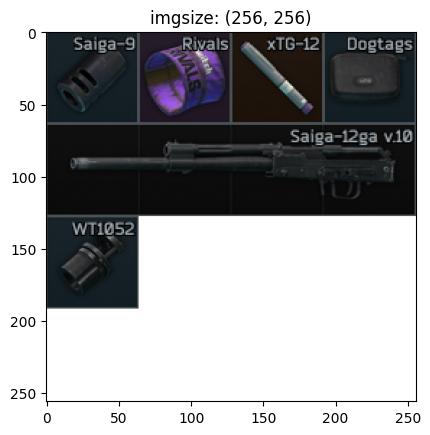

In [32]:
from GridPacker import GridPacker
images = [Image.open(path)
          for path in items_df.sample(8)['GridItems']]
image = GridPacker(256, 256 , 64).pack(images)
plot_image(image)

In [81]:
def get_rand_images(df: pd.DataFrame,
                    uniq_items=5,
                    max_group_items=3,
                    img_column='GridItems'):
    samples = df.sample(uniq_items)[img_column].tolist()
    counts = np.random.randint(1, max_group_items,
                               size=len(samples))
    new_sample = []
    for i, sample in enumerate(samples):
        new_sample.extend([sample]*counts[i])
    np.random.shuffle(new_sample)
    imgs = [Image.open(path) for path in new_sample]
    return imgs

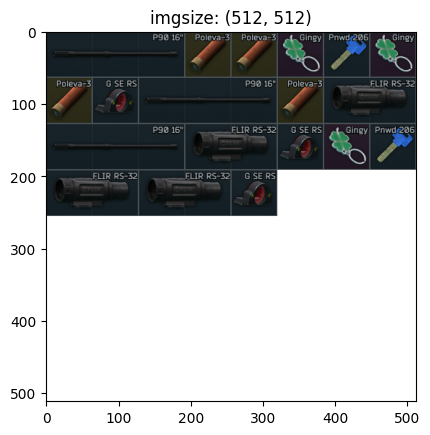

In [96]:
images = get_rand_images(df=items_df,
                         uniq_items=6,
                         max_group_items=5)
image = GridPacker(512, 512 , 64).pack(images)
plot_image(image)

In [78]:
[1] * np.int16(3)

[1, 1, 1]